# Main goal: 
- Hani is looking for the final list of genes which are drug induced significantly methylated, expressed and stabilized. 

    ○ Venn diagram 

    ○ UpsetR 

=> table of these genes with all logFCs, pvalues and screening scores. 


In [1]:
import pandas as pd 
import numpy as np

from utility import *

# Intersectional genes 
Find top genes across all cell lines and high throughput experiments:

- $\Delta$RNA expression 
- $\Delta$RNA stability 
- $\Delta$RNA methylation  
- $\Delta$Phenotype (CRISPR Screen Rho score)
- $\Delta$Translational efficiency

In [2]:
Top = {}

Top['TE']   = set_Top_TE  (0,0.05)
Top['Mtyl'] = set_Top_Mtyl(0,0.05)
Top['Rho']  = set_Top_Rho (0,0.05)
Top['Exp']  = set_Top_Exp (0,0.05, 1)
Top['Stbl'] = set_Top_Stbl(0,0.05, 1)


Subset Top TE data frame:
up:  40
down: 11
(te_thr=0, fdr_thr=0.05)
Subset Top Mtyl data frame:
up:  2986
down: 2722
(fc_thr=0, pv_thr=0.05)
Subset Top Rho data frame:
up:  859
down: 907
(sc_thr=0, pv_thr=0.05)
Subset Top Exp data frame:
up:  9736
down: 9475
(fc_thr=0, pv_thr=0.05) in more than 1 cell lines
Subset Top Stbl data frame:
up:  1329
down: 1368
(fc_thr=0, pv_thr=0.05) in more than 1 cell lines


### Intersection of all genes across different datasets

- https://pypi.org/project/venn/

Select top gene names 

In [3]:
Exp_up = Top['Exp']['up'].gene_name.tolist()
Stbl_up = Top['Stbl']['up'].gene_name.tolist()
TE_up = Top['TE']['up'].gene_name.tolist()
Rho_up = Top['Rho']['up'].gene_name.tolist()
Hyper_m6A = Top['Mtyl']['up'].gene_name.tolist()

Exp_down = Top['Exp']['down'].gene_name.tolist()
Stbl_down = Top['Stbl']['down'].gene_name.tolist()
TE_down = Top['TE']['down'].gene_name.tolist()
Rho_down = Top['Rho']['down'].gene_name.tolist()
Hypo_m6A = Top['Mtyl']['down'].gene_name.tolist()

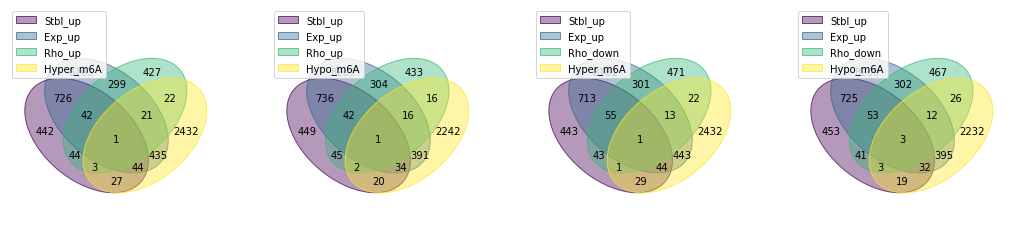

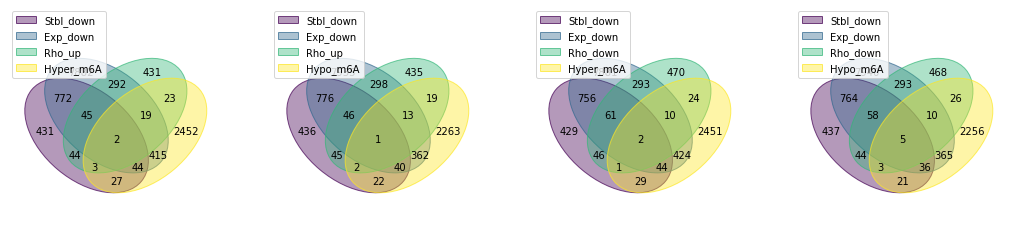

In [4]:
import numpy as np
import itertools
from matplotlib.pyplot import subplots
from itertools import chain
from venn import venn 

def iter_by_two(input1,input2,input3):
    # inputs are variable names 
    # it will give 8 combinations 
    out = []
    for comb in list(itertools.product(input1,input2,input3)):
        a,b,c = comb
        out.append([a,b,c])
    return out 

studies = iter_by_two(['Exp_up', 'Exp_down'],['Rho_up', 'Rho_down'],['Hyper_m6A', 'Hypo_m6A'])
studies = [[s[0].replace('Exp','Stbl'),s[0],s[1],s[2]] for s in studies]

_, top_axs = subplots(ncols=4, nrows=1, figsize=(18, 8))
_, bot_axs = subplots(ncols=4, nrows=1, figsize=(18, 8))
# cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
# letters = iter(ascii_uppercase)

for std,ax in zip(studies,chain(top_axs, bot_axs)):
    data = {}
    data = dict([[a,set(eval(a))] for a in std])
    venn(data,fontsize=10,legend_loc="upper left", ax=ax)

# Final merged table

### Rho_down & Exp_down & Stbl_down & Hyper_m6A

In [5]:
hypothesis1 = list(set(Rho_down).intersection(Exp_down,Stbl_down,Hyper_m6A))

make_final_table(hypothesis1)

,Exp.hl60.log2FC_120h,Exp.hl60.pval_120h,Exp.kg1.log2FC,Exp.kg1.pval,Exp.molm14.log2FC,Exp.molm14.pval,Exp.ociaml2.log2FC,Exp.ociaml2.pval,Exp.ociaml3.log2FC,Exp.ociaml3.pval,...,Stbl.ociaml3.logFC,Stbl.ociaml3.pval,Stbl.thp1.logFC,Stbl.thp1.pval,TE.Estimate_treatmentDRUG,TE.fdr_Pr...z.._treatmentDRUG,Rho.Mann-Whitney p-value,Rho.rho score,Gamma.Mann-Whitney p-value,Gamma.gamma score
gene_name,,,,,,,,,,,,,,,,,,,,,
MCM6,-0.260608,2.644117e-01,-0.372325,0.006128,-0.706042,0.000015,-0.062433,0.694125,-0.377572,0.011931,...,0.192816,0.155195,0.063040,0.487625,0.141152,0.568586,0.0176399,-0.256772,0.000117131,-0.364115
MEF2D,1.563055,1.371875e-08,-0.031726,0.891686,-0.347330,0.104679,-0.220338,0.216834,-0.409503,0.017260,...,0.228954,0.115202,0.120834,0.277893,0.119764,0.907884,0.0498476,-0.0656627,0.00318461,-0.038707


### Rho_down & Exp_down & Hyper_m6A

In [6]:
hypothesis2 = list(set(Rho_down).intersection(Exp_down,Hyper_m6A))

make_final_table(hypothesis2)

,Exp.hl60.log2FC_120h,Exp.hl60.pval_120h,Exp.kg1.log2FC,Exp.kg1.pval,Exp.molm14.log2FC,Exp.molm14.pval,Exp.ociaml2.log2FC,Exp.ociaml2.pval,Exp.ociaml3.log2FC,Exp.ociaml3.pval,...,Stbl.ociaml3.logFC,Stbl.ociaml3.pval,Stbl.thp1.logFC,Stbl.thp1.pval,TE.Estimate_treatmentDRUG,TE.fdr_Pr...z.._treatmentDRUG,Rho.Mann-Whitney p-value,Rho.rho score,Gamma.Mann-Whitney p-value,Gamma.gamma score
ACBD3,-0.255428,2.956786e-04,0.408222,0.224012,-0.004804,9.774198e-01,-0.033640,0.839696,0.277632,0.272227,...,NaN,NaN,NaN,NaN,0.014849,0.991344,0.00126337,-0.142158,0.0168892,0.0409318
SFPQ,-0.037906,4.397616e-01,-0.293200,0.086317,-0.317340,4.290813e-02,-0.175780,0.304325,-0.017672,0.933338,...,-0.161741,0.284903,0.052482,0.577053,0.226904,0.185863,0.00230533,-0.200517,0.00880856,-0.102862
MEF2D,1.563055,1.371875e-08,-0.031726,0.891686,-0.347330,1.046792e-01,-0.220338,0.216834,-0.409503,0.017260,...,0.228954,0.115202,0.120834,0.277893,0.119764,0.907884,0.0498476,-0.0656627,0.00318461,-0.038707
MCM6,-0.260608,2.644117e-01,-0.372325,0.006128,-0.706042,1.485079e-05,-0.062433,0.694125,-0.377572,0.011931,...,0.192816,0.155195,0.063040,0.487625,0.141152,0.568586,0.0176399,-0.256772,0.000117131,-0.364115
MTF1,-0.157071,8.235729e-06,0.016280,0.937028,-0.446972,2.140451e-01,0.305052,0.204213,0.002159,0.993814,...,NaN,NaN,NaN,NaN,0.124444,0.940129,0.00201799,-0.297069,0.137841,-0.146795
UCK2,1.413515,3.036888e-11,0.099486,0.557710,-0.166197,3.703695e-01,0.169666,0.312809,0.003967,0.982084,...,NaN,NaN,NaN,NaN,0.407555,0.543413,0.00679669,-0.141699,0.600712,-0.00531935
LMO4,-0.422088,3.748506e-04,0.595350,0.001234,-0.132534,4.611962e-01,-0.108333,0.569185,0.297329,0.221916,...,-0.078583,0.517867,0.040331,0.681654,-0.122797,0.927343,0.020828,-0.0850827,0.122142,0.0282576
CHI3L2,1.144042,3.511034e-02,2.592999,0.249316,-1.679973,2.290830e-01,-0.852745,0.564122,1.009644,0.413695,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0342496,-0.134453,0.255808,-0.0222494
ENO1,-0.228210,9.702674e-02,-0.074568,0.673064,-0.349341,4.168188e-02,-0.035007,0.820917,0.142302,0.610297,...,-0.051891,0.721501,0.002783,0.981011,0.170456,0.022071,0.0499464,-0.220227,0.971943,-0.00204534
SLC16A1,1.800265,2.891163e-24,-0.206306,0.193738,-0.896546,5.054270e-07,-0.286578,0.123413,-0.597357,0.000597,...,NaN,NaN,NaN,NaN,-1.849582,0.192857,0.00831795,-0.178622,0.196717,-0.0273967


### Rho_up & Exp_down & Stbl_down & Hyper_m6A

In [8]:
hypothesis3 = list(set(Rho_up).intersection(Exp_down,Stbl_down,Hyper_m6A))

make_final_table(hypothesis3)

,Exp.hl60.log2FC_120h,Exp.hl60.pval_120h,Exp.kg1.log2FC,Exp.kg1.pval,Exp.molm14.log2FC,Exp.molm14.pval,Exp.ociaml2.log2FC,Exp.ociaml2.pval,Exp.ociaml3.log2FC,Exp.ociaml3.pval,...,Stbl.ociaml3.logFC,Stbl.ociaml3.pval,Stbl.thp1.logFC,Stbl.thp1.pval,TE.Estimate_treatmentDRUG,TE.fdr_Pr...z.._treatmentDRUG,Rho.Mann-Whitney p-value,Rho.rho score,Gamma.Mann-Whitney p-value,Gamma.gamma score
MSH2,0.570997,9.345765e-09,-0.327930,0.062360,-0.707776,0.000106,-0.234308,0.213572,-0.336881,0.054838,...,-0.012684,0.916366,-0.167781,0.221697,0.154781,0.722210,0.00587056,0.142873,0.147186,-0.0302337
TMEM131,-0.335044,6.171198e-03,-0.093577,0.560429,0.057964,0.729947,0.027949,0.856325,-0.017475,0.931948,...,-0.202671,0.121390,-0.215341,0.041291,0.063921,0.932726,0.0222428,0.161288,0.00265797,-0.0662091


### Rho_up & Exp_down & Hyper_m6A

In [9]:
hypothesis4 = list(set(Rho_up).intersection(Exp_down,Hyper_m6A))

make_final_table(hypothesis4)

,Exp.hl60.log2FC_120h,Exp.hl60.pval_120h,Exp.kg1.log2FC,Exp.kg1.pval,Exp.molm14.log2FC,Exp.molm14.pval,Exp.ociaml2.log2FC,Exp.ociaml2.pval,Exp.ociaml3.log2FC,Exp.ociaml3.pval,...,Stbl.ociaml3.logFC,Stbl.ociaml3.pval,Stbl.thp1.logFC,Stbl.thp1.pval,TE.Estimate_treatmentDRUG,TE.fdr_Pr...z.._treatmentDRUG,Rho.Mann-Whitney p-value,Rho.rho score,Gamma.Mann-Whitney p-value,Gamma.gamma score
SLC6A20,1.206834,2.519860e-02,0.918088,0.352388,1.259865,0.271128,-2.650165,0.012432,1.071316,0.201365,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0432376,0.0774343,0.628967,-0.010128
MRPL9,1.800786,5.643539e-12,-0.286210,0.102172,-0.287571,0.150551,0.250177,0.287494,-0.518568,0.038305,...,NaN,NaN,NaN,NaN,-0.155038,0.893222,0.00288828,0.144698,0.00025029,-0.232271
TTC24,1.719701,7.960186e-01,-1.325101,0.042348,NaN,NaN,0.400511,0.861518,-1.826989,0.651439,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00262083,0.1697,0.974615,0.0355165
CTSK,0.619149,2.040619e-01,0.139430,0.899428,0.496117,0.645394,-1.639188,0.178626,0.554341,0.412652,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046755,0.0904569,0.494404,-0.0195168
GREB1,0.590645,4.565783e-01,-0.152567,0.715700,0.282140,0.808558,0.576708,0.540513,-1.171591,0.026395,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0198208,0.0869877,0.184415,0.0561801
HNRNPU,-0.129759,4.354481e-01,-0.216745,0.246770,-0.456809,0.002849,0.115574,0.365777,0.096698,0.643306,...,0.020860,0.889410,-0.004460,0.964859,0.268148,0.001581,0.0489654,0.132367,0.383809,-0.0425436
CDK18,0.738440,7.287003e-01,0.201004,0.897594,0.584568,0.149347,0.269656,0.405711,-0.443172,0.157660,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0231814,0.126849,0.190298,-0.0206226
SRM,1.333044,1.167008e-09,-0.387935,0.098412,-0.190280,0.511287,-0.030205,0.875547,0.050346,0.832267,...,NaN,NaN,NaN,NaN,0.196854,0.707356,0.0336788,0.0798143,0.114066,-0.0727709
NUP35,-0.157252,8.366084e-02,-0.078150,0.738598,-0.534280,0.030826,-0.087652,0.703460,-0.127036,0.600484,...,NaN,NaN,NaN,NaN,-0.195545,0.877835,0.00438646,0.133577,0.370689,0.00643263
SLC40A1,-1.805903,9.157184e-22,0.220866,0.333506,-0.752589,0.596286,0.461624,0.023219,1.539103,0.000218,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00545656,0.106535,0.565091,0.0277337


In [ ]:
# final.to_csv('combined.txt', sep='\t')

In [ ]:
# # https://stackoverflow.com/questions/3852780/python-intersection-of-multiple-lists
# def intersect(*d):
#     sets = iter(map(set, d))
#     result = sets.next()
#     for s in sets:
#         result = result.intersection(s)
#     return result

In [ ]:
# %reload_ext rpy2.ipython

In [ ]:
# %%R 
# suppressMessages(suppressWarnings(library (UpSetR)))
# suppressMessages(suppressWarnings(library (gplots)))
# suppressMessages(suppressWarnings(library (patchwork)))

In [ ]:
# %%R 
# intersect <- function(Vecs){
#     intersection <- Reduce(intersect,Vecs)
#     SET = upset(fromList(Vecs), order.by = "freq")
#     print (SET)
#     return(intersection)
# }

In [ ]:
# %%R -i Rho_down,Exp_down,Stbl_down,Hyper_m6A -o ouput1

# Vecs <- list(
#     delta_mtyl = unlist(M_genes),
#     delta_te = unlist(T_genes),
#     rho = unlist(R_genes),
#     delta_stbl = unlist(S_genes),
#     delta_exp = unlist(E_genes)
# )

# A_genes = intersect(Vecs)